In [2]:
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
from time import sleep

In [5]:
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 86
Current browser version is 91.0.4472.77 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [3]:
url = "https://www.chess.com/member/jsteele619"
browser.visit(url)

sleep(3)

html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [5]:
games = []
results = soup.find_all('tr', class_="v-board-popover archived-games-table-row")
for result in results:
    href = result.find('a')['href']
    games.append(f'chess.com{href}')
    games.append(None)

In [6]:
names = []
results = soup.find_all('a', class_="user-username-component user-username-blue user-username-link user-tagline-popover-username")
for result in results:
    names.append(result.text)

In [7]:
rating = []
results = soup.find_all('span', class_="user-tagline-popover-rating")
for result in results:
    rate = re.sub("\D", "", result.text)
    rating.append(rate)

In [8]:
score = []
results = soup.find_all('div', class_="archived-games-user-score")
for result in results:
    score.append(result.text)

In [27]:
date = []
date_df = []
results = soup.find_all('td', class_="table-text-right")
for result in results:
    date.append(result.text)
    date_df.append(result.text)
    date_df.append(result.text)

In [10]:
color = []
for i in range(len(score)):
    if i % 2 == 0:
        color.append("white")
    else:
        color.append("black")

In [17]:
len(date)

40

In [28]:
df = {"Players": names, "Color": color, "Rating": rating, "Score": score, "Game Link": games, "Date": date_df}
chess_df = pd.DataFrame(df)
chess_df.head()
html = chess_df.to_html()
chess_df.head()

,Players,Color,Rating,Score,Game Link,Date
0,jsteele619,white,2096,½,chess.com/live/game/5852148979?username=jsteel...,"Nov 29, 2020"
1,armstrongtangahu,black,1948,½,None,"Nov 29, 2020"
2,powturn,white,1981,1,chess.com/live/game/5852137754?username=jsteel...,"Nov 29, 2020"
3,jsteele619,black,2099,0,None,"Nov 29, 2020"
4,jsteele619,white,2110,1,chess.com/live/game/5852104438?username=jsteel...,"Nov 29, 2020"


In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
graph = []
list1 = []

x = 0
for i in range(len(chess_df)):
    if chess_df.loc[i, "Players"] == ('jsteele619'):
        graph.append(chess_df.loc[i, "Rating"])
        x = x + 1
        list1.append(x)

In [21]:
line = []
for graphs in graph:
    here = int(graphs)
    line.append(here)

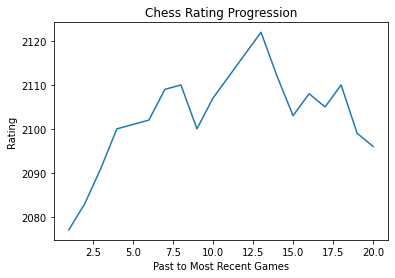

In [30]:
line.reverse()
fig = plt.figure()
ax = plt.axes()
ax.plot(list1, line, label="rating")

plt.title("Chess Rating Progression")
plt.xlabel("Past to Most Recent Games")
plt.ylabel("Rating")
plt.savefig("templates/chessgraph.png")
plt.show()